In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
#Ignore this
#y = Air_Temp_C_2015 
#x = filtered_met_2015['DateTime'] 
#plt.style.use('ggplot')
#plt.title('Air Temperature', color='black')
#plt.xlabel('Date & Time (hr)', color='black')
#plt.ylabel('Air Temperature (C)', color='black')  
#plt.tick_params(labelrotation=45)
#plt.plot(x, y, ':')  
#plt.show() 

In [3]:
df_met_5_25_2023 = pd.read_csv('1_2023---6_2023_Met_Station.csv', parse_dates=['DateTime'])
df_met_7_6_2023 = pd.read_csv('7_6_23_LDP_BD_Met_Station.csv', parse_dates=['DateTime'])
df_met_8_3_2023 = pd.read_csv('8_3_23_LDP_Met.csv', parse_dates=['DateTime'])

In [4]:
#filter dataframe DateTimes
May = df_met_5_25_2023.loc[(df_met_5_25_2023['DateTime'] >= '2023-05-25 17:00:00')
                     & (df_met_5_25_2023['DateTime'] < '2023-05-30 23:00:00')]
June = df_met_7_6_2023.loc[(df_met_7_6_2023['DateTime'] >= '2023-06-01 00:00:00')
                     & (df_met_7_6_2023['DateTime'] < '2023-06-30 23:00:00')]
July = df_met_8_3_2023.loc[(df_met_8_3_2023['DateTime'] >= '2023-07-01 00:00:00')
                     & (df_met_8_3_2023['DateTime'] < '2023-07-30 23:00:00')]

In [5]:
#Create data naming for graphing from csv columns and filtered dataframes
Net_Radiation_Shortwave_May = (May['Solar_Radiation_Shortwave_Up_Average_W/m2']+May['Solar_Radiation_Shortwave_Down_Average_W/m2'])
Net_Radiation_Longwave_May = (May['Solar_Radiation_Longwave_Up_Average_W/m2']+May['Solar_Radiation_Longwave_Down_Average_W/m2'])
Available_Energy_May = Net_Radiation_Shortwave_May-Net_Radiation_Longwave_May
Net_Radiation_Shortwave_June = (June['Solar_Radiation_Shortwave_Up_Average_W/m2']+June['Solar_Radiation_Shortwave_Down_Average_W/m2'])
Net_Radiation_Longwave_June = (June['Solar_Radiation_Longwave_Up_Average_W/m2']+June['Solar_Radiation_Longwave_Down_Average_W/m2'])
Available_Energy_June = ((Net_Radiation_Shortwave_June-Net_Radiation_Longwave_June)+Available_Energy_May)
Net_Radiation_Shortwave_July = (July['Solar_Radiation_Shortwave_Up_Average_W/m2']+July['Solar_Radiation_Shortwave_Down_Average_W/m2'])
Net_Radiation_Longwave_July = (July['Solar_Radiation_Longwave_Up_Average_W/m2']+July['Solar_Radiation_Longwave_Down_Average_W/m2'])
Available_Energy_July = Net_Radiation_Shortwave_July-Net_Radiation_Longwave_July

In [6]:
#Create data naming for graphing from csv columns and filtered dataframes
Soil_Moisture_May = (May['Soil_Moisture1_period_8cm_west_Average']+May['Soil_Moisture2_period_8cm_east_Average'])
Volumetric_Water_Content_May = (May['Volumetric_Water_Content_Soil_Moisture1_8cm_west_Avgerage_cm3/cm3']+May['Volumetric_Water_Content2_Soil_Moisture_8cm_east_Average_cm3/cm3'])
Soil_Moisture_June = (June['Soil_Moisture1_period_8cm_west_Average']+June['Soil_Moisture2_period_8cm_east_Average'])
Volumetric_Water_Content_June = (June['Volumetric_Water_Content_Soil_Moisture1_8cm_west_Avgerage_cm3/cm3']+June['Volumetric_Water_Content2_Soil_Moisture_8cm_east_Average_cm3/cm3'])
Soil_Moisture_July = (July['Soil_Moisture1_period_8cm_west_Average']+July['Soil_Moisture2_period_8cm_east_Average'])
Volumetric_Water_Content_July = (July['Volumetric_Water_Content_Soil_Moisture1_8cm_west_Avgerage_cm3/cm3']+July['Volumetric_Water_Content2_Soil_Moisture_8cm_east_Average_cm3/cm3'])

In [7]:
#Create data naming for graphing from csv columns and filtered dataframes
Air_Temp_May = (May['Air_Temp_Average_DegC'])
Relative_Humidity_May = (May['Relative_Humidity_Average_%'])
Air_Temp_June = (June['Air_Temp_Average_DegC']) 
Relative_Humidity_June = (June['Relative_Humidity_Average_%'])
Air_Temp_July = (July['Air_Temp_Average_DegC'])
Relative_Humidity_July = (July['Relative_Humidity_Average_%'])

In [8]:
#Hung up, don't know why there's TypeError: can't convert to series class 'float' line 8

#Calculating Vapor Pressure Defecit (VPD)

from math import exp

#First saturated vapor pressure
may_sat_vp = 0.6108 * exp(17.27 * Air_Temp_May / (Air_Temp_May + 237.3))
june_sat_vp = 0.6108 * exp(17.27 * Air_Temp_June / (Air_Temp_June + 237.3))
july_sat_vp = 0.6108 * exp(17.27 * Air_Temp_July / (Air_Temp_July + 237.3))

#Now actual vapor pressure 
may_actual_vp = Relative_Humidity_May / 100 * may_sat_vp
june_actual_vp = Relative_Humidity_June / 100 * june_sat_vp
july_actual_vp = Relative_Humidity_July / 100 * july_sat_vp

#VPD
May_VPD = may_sat_vp-may_actual_vp
June_VPD = june_sat_vp-june_actual_vp
July_VPD = july_sat_vp-july_actual_vp

TypeError: cannot convert the series to <class 'float'>

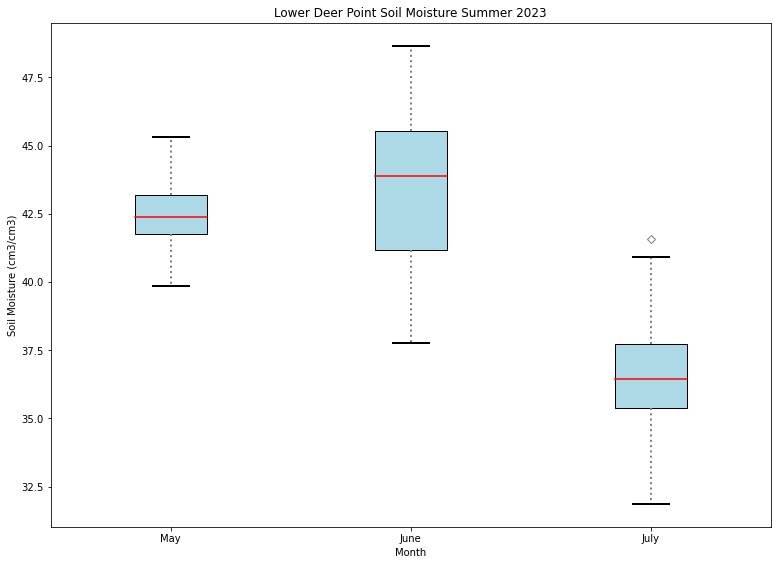

In [9]:
#Mostly Will's code, once I know better, redo
np.random.seed(10)

#List datasets
data_1 = np.random.normal(Soil_Moisture_May)
data_2 = np.random.normal(Soil_Moisture_June)
data_3 = np.random.normal(Soil_Moisture_July)

data = [data_1, data_2, data_3]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([1, 1, 1, 1])
 
# Creating boxplot
bp = ax.boxplot(data, patch_artist = True)

colors = ['lightblue', 'lightblue',
          'lightblue', 'lightblue']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color) 

# changing color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='gray',
                linewidth = 2,
                linestyle =":")
    
# changing color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)   
# changing color and linewidth of the medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 1.5)
    
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='red',
              alpha = 0.5)

# Adding title and x-y axis labels
plt.title("Lower Deer Point Soil Moisture Summer 2023")
plt.xlabel("Month")
plt.ylabel("Soil Moisture (cm3/cm3)")
 
# Removing top axes and right axes and setting ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# x-axis labels
ax.set_xticklabels(['May', 'June','July'])
    
plt.show()

In [10]:
#Hexbin
np.random.seed(10000)

##Errors are ValueError: maximum supported dimension for array is 32, found 126 in line 7
n = Available_Energy_May
X = np.random.standard_normal(n)
y = np.random.standard_normal(n)
z = [1, 2, 3, 4]

xmin = x.min() 
xmax = x.max() 
ymin = y.min() 
ymax = y.max() 
    
hb = plt.hexbin(x, y, gridsize = 50, 
               bins = z, cmap ='BuGn') 
    
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
    
cb = plt.colorbar(hb) 
cb.set_label(z)
plt.title('Hexbin plot')
  
plt.show()


ValueError: maximum supported dimension for an ndarray is 32, found 126

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10000)

##Errors are ValueError: maximum supported dimension for array is 32, found 126 in line 7
n = Available_Energy_May
x = np.random.standard_normal(n)
y = 2.0 + 3.0 * x + 4.0 * np.random.standard_normal(n)
xlim = x.min(), x.max()
ylim = y.min(), y.max()

fig, (ax0, ax1) = plt.subplots(ncols=2, sharey=True, figsize=(9, 4))

hb = ax0.hexbin(x, y, gridsize=50, cmap='inferno')
ax0.set(xlim=xlim, ylim=ylim)
ax0.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax0, label='counts')

hb = ax1.hexbin(x, y, gridsize=50, bins='log', cmap='inferno')
ax1.set(xlim=xlim, ylim=ylim)
ax1.set_title("With a log color scale")
cb = fig.colorbar(hb, ax=ax1, label='log10(N)')

plt.show()

ValueError: maximum supported dimension for an ndarray is 32, found 126